In [1]:
path = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'
import pandas as pd
data = pd.read_stata(path)

## Data preparation

In [2]:
data.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [3]:
data.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)

In [4]:
y = data['S1']
y.value_counts()

Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64

In [5]:
x = data.drop(['S1'], inplace=False, axis=1)
x.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


### Choosing ge

In [6]:
features = ["Q9", "Q16", "w6_sex_frequency", "partner_yrsed", "ppagecat"]

* Q9 - partner's age
* Q16 - relatives seen
* partnet_yrsed - partner's educational attainment
* ppagecat - age

In [7]:
x = x[features]

In [8]:
x = x.rename(index=str, columns={
    "Q9": "partner_age",
    "Q16": "relatives_seen",
    "w6_sex_frequency": "sex_frequency",
    "partner_yrsed": "educational_attainment",
    "ppagecat": "age"
})

In [9]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
0,NaN,NaN,NaN,12.0,25-34
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
3,NaN,NaN,NaN,12.0,25-34
4,59,0.0,3 to 6 times a week,16.0,55-64


In [10]:
for f in x.columns:
    print("\n################ {} ##########\n".format(f))
    print(x[f].value_counts(dropna=False))


################ partner_age ##########

NaN        654
55.0        79
60.0        73
58.0        70
62.0        66
27.0        64
53.0        64
29.0        63
37.0        63
52.0        63
30.0        62
56.0        61
63.0        60
26.0        60
34.0        58
65.0        58
59.0        57
28.0        56
61.0        56
49.0        55
46.0        54
42.0        54
50.0        53
57.0        53
45.0        51
36.0        50
38.0        50
64.0        50
54.0        49
51.0        48
          ... 
22.0        29
74.0        28
21.0        25
24.0        24
23.0        24
73.0        23
Refused     21
78.0        19
76.0        19
79.0        17
77.0        13
18.0        12
20.0        12
80.0        11
81.0         8
19.0         7
84.0         7
83.0         7
82.0         3
91.0         3
85.0         3
86.0         3
90.0         2
17.0         2
87.0         1
95.0         1
16.0         1
14.0         1
10.0         1
89.0         1
Name: partner_age, Length: 80, dtype: int64

In [11]:
x = x[-pd.isna(x['educational_attainment'])]

In [12]:
x = x[-pd.isna(x['partner_age'])]

In [13]:
x = x[x['partner_age'] != 'Refused']

In [14]:
x = x[-pd.isna(x['relatives_seen'])]

In [15]:
x = x[-pd.isna(x['sex_frequency'])]

In [16]:
x = x[x['sex_frequency'] != 'Refused']

In [17]:
len(x)

2663

In [18]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52,1.0,Once a month or less,17.0,55-64
2,45,0.0,2 to 3 times a month,14.0,45-54
4,59,0.0,3 to 6 times a week,16.0,55-64
5,60,0.0,Once a month or less,16.0,55-64
6,67,0.0,Once a month or less,13.0,65-74


In [19]:
x['partner_age'] = x['partner_age'].astype('float')

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['educational_attainment', 'relatives_seen', 'partner_age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['age', 'sex_frequency']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Train model

In [21]:
from xgboost import XGBClassifier

In [22]:
x.head()

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
1,52.0,1.0,Once a month or less,17.0,55-64
2,45.0,0.0,2 to 3 times a month,14.0,45-54
4,59.0,0.0,3 to 6 times a week,16.0,55-64
5,60.0,0.0,Once a month or less,16.0,55-64
6,67.0,0.0,Once a month or less,13.0,65-74


In [23]:
valid_rows = [int(row) for row in x.index]
y = y[valid_rows]

In [24]:
print(x.shape, y.shape)

(2663, 5) (2663,)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier())])
rf_clf = rf_clf.fit(x, y)

/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Observation to be explained

In [26]:
observation = x.iloc[70:71]
observation

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
99,29.0,3.0,Once or twice a week,16.0,25-34


### Person details
Widzimy osobę w przedziale wiekowym 25-34 lata, której partner ma lat 29, a jego najwyższe wykształcenie to licencjat. Para uprawia seks 1-2 razy w tygodniu. Badana osoba spotyka średnio miesięczne troje krewnych.

In [27]:
rf_clf.classes_

array(['No, I am not Married', 'Yes, I am Married'], dtype=object)

In [28]:
print('Szansa pozostania w związku wynosi {}'.format(rf_clf.predict_proba(observation)[0][1]))

Szansa pozostania w związku wynosi 0.54


/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [29]:
import numpy as np
def break_down(obs, variables, data, model):
    data = data.copy()
    average = np.mean(model.predict_proba(data)[::, 1])
    attributions = [average]
    for var in variables:
        data[var] = obs[var].iloc[0]
        prev_average = average
        average = np.mean(model.predict_proba(data)[::, 1])
        attributions.append(average - prev_average)
    return attributions

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn
warnings.filterwarnings("ignore", category=sklearn.exceptions.DataConversionWarning)
def plot_break_down(obs, variables, data, model):
    plt.figure(figsize=(12, 4))
    plt.bar(['intercept'] + variables, break_down(obs, variables, data, model))    

### Generate perturbated data, define proximity

In [33]:
observation

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
99,29.0,3.0,Once or twice a week,16.0,25-34


In [47]:
x['sex_frequency'].value_counts()

Once a month or less    962
Once or twice a week    735
2 to 3 times a month    515
3 to 6 times a week     366
Once a day or more       85
Refused                   0
Name: sex_frequency, dtype: int64

In [49]:
sex_freq_close_values = {
    0: 'Once a month or less',
    1: '2 to 3 times a month',
    2: 'Once or twice a week',
    3: '3 to 6 times a week',
    4: 'Once a day or more'
}
inv_sex_freq = {v: k for k, v in sex_freq_close_values.items()}

In [52]:
x['age'].value_counts()

55-64    601
25-34    510
35-44    470
45-54    459
65-74    359
75+      134
18-24    130
Name: age, dtype: int64

In [145]:
age_close = {
    20:'18-24',
    30:'25-34',
    40:'35-44',
    50:'45-54',
    60:'55-64',
    70:'65-74',
    80:'75+'
}
inv_age = {v: k for k, v in age_close.items()}

In [178]:
def perturbated_data(observation, n=20):
    data = pd.concat([observation for _ in range(n)])
    data.reset_index(drop=True, inplace=True)
    # how many variables we change
    changes = np.random.randint(1, observation.shape[1] + 1, n)
    weights = 1 / changes
    for i in range(n):
        changed_vars = np.random.choice(observation.columns, changes[i], replace=False)
        if 'partner_age' in changed_vars:
            data.loc[i, 'partner_age'] += np.random.choice([-5, -2, -1, 0, 1, 2, 5])
        if 'relatives_seen' in changed_vars:
            data.loc[i, 'relatives_seen'] += np.random.choice([-1, 0, 1])
        if 'educational_attainment' in changed_vars:
            data.loc[i, 'educational_attainment'] += np.random.choice([-1, 0, 1])
        if 'age' in changed_vars:
            current = data.loc[i, 'age']
            index = inv_age[current]
            index += np.random.choice([-10, 0, 10])
            data.loc[i, 'age'] = age_close.get(index, current)
        if 'sex_frequency' in changed_vars:
            current = data.loc[i, 'sex_frequency']
            index = inv_sex_freq[current]
            index += np.random.choice([-1, 0, 1])
            data.loc[i, 'sex_frequency'] = sex_freq_close_values.get(index, current)
    return data, weights

perturbated_data(observation)

(    partner_age  relatives_seen         sex_frequency  educational_attainment  \
 0          27.0             2.0  Once or twice a week                    16.0   
 1          29.0             4.0   3 to 6 times a week                    17.0   
 2          31.0             3.0   3 to 6 times a week                    16.0   
 3          30.0             3.0   3 to 6 times a week                    16.0   
 4          30.0             4.0   3 to 6 times a week                    16.0   
 5          30.0             4.0   3 to 6 times a week                    15.0   
 6          29.0             3.0  Once or twice a week                    16.0   
 7          24.0             4.0  Once or twice a week                    17.0   
 8          30.0             2.0  Once or twice a week                    15.0   
 9          27.0             4.0  2 to 3 times a month                    17.0   
 10         29.0             2.0  Once or twice a week                    15.0   
 11         30.0

### Fit decision tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
local_data, weights = perturbated_data(observation, n=500)
local_y = rf_clf.predict(local_data)

##### Encode numerically categorical features

In [181]:
local_data['sex_frequency'] = local_data['sex_frequency'].replace(inv_sex_freq)

In [182]:
local_data['age'] = local_data['age'].replace(inv_age)

In [183]:
local_data.head(n=20)

,partner_age,relatives_seen,sex_frequency,educational_attainment,age
0,29.0,3.0,2,17.0,30
1,29.0,3.0,2,15.0,30
2,27.0,3.0,2,15.0,40
3,29.0,3.0,2,16.0,40
4,30.0,3.0,1,16.0,40
5,27.0,2.0,2,15.0,30
6,28.0,2.0,2,15.0,20
7,29.0,3.0,2,17.0,30
8,29.0,2.0,2,16.0,20
9,28.0,3.0,2,16.0,30


In [184]:
white_box = DecisionTreeClassifier(max_leaf_nodes=8)
white_box.fit(local_data, local_y, weights)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [185]:
white_box.feature_importances_

array([0.21616677, 0.20898025, 0.        , 0.13900249, 0.43585049])

<BarContainer object of 5 artists>

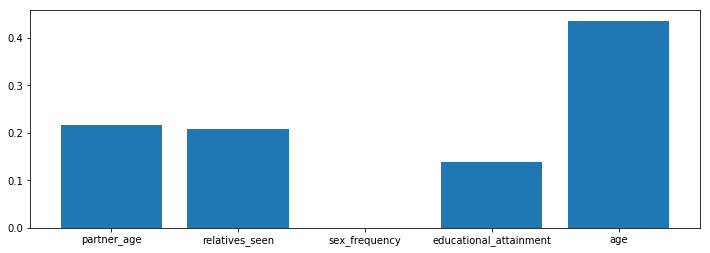

In [186]:
plt.figure(figsize=(12, 4))
plt.bar(local_data.columns, white_box.feature_importances_)

Powyżej widzimy ważność zmiennych w drzewie decyzyjnym. W przeciwieństwie do metod break down, nie musimy martwić się o kolejność zmiennych. Widzimy, że podobnie jak w analizach metodą breakdown otrzymujemy największą ważność dla zmiennych dotyczących wieku partnerów. Mniej ważna jest np. *sex_frequency*

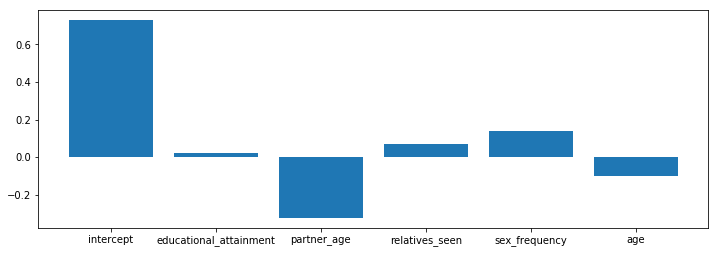

In [187]:
plot_break_down(observation, 
                ['educational_attainment', 'partner_age', 'relatives_seen', 'sex_frequency', 'age'],
                x, rf_clf)

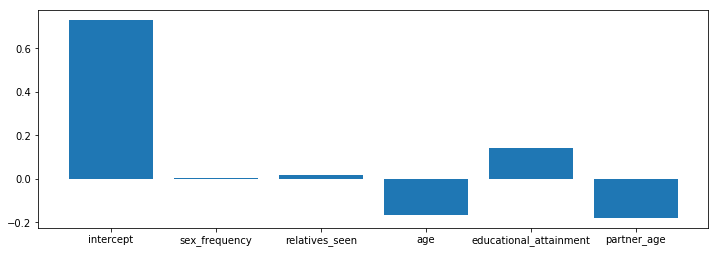

In [188]:
plot_break_down(observation, 
                ['sex_frequency', 'relatives_seen', 'age', 'educational_attainment', 'partner_age'],
                x, rf_clf)

### Visualize white box decision tree

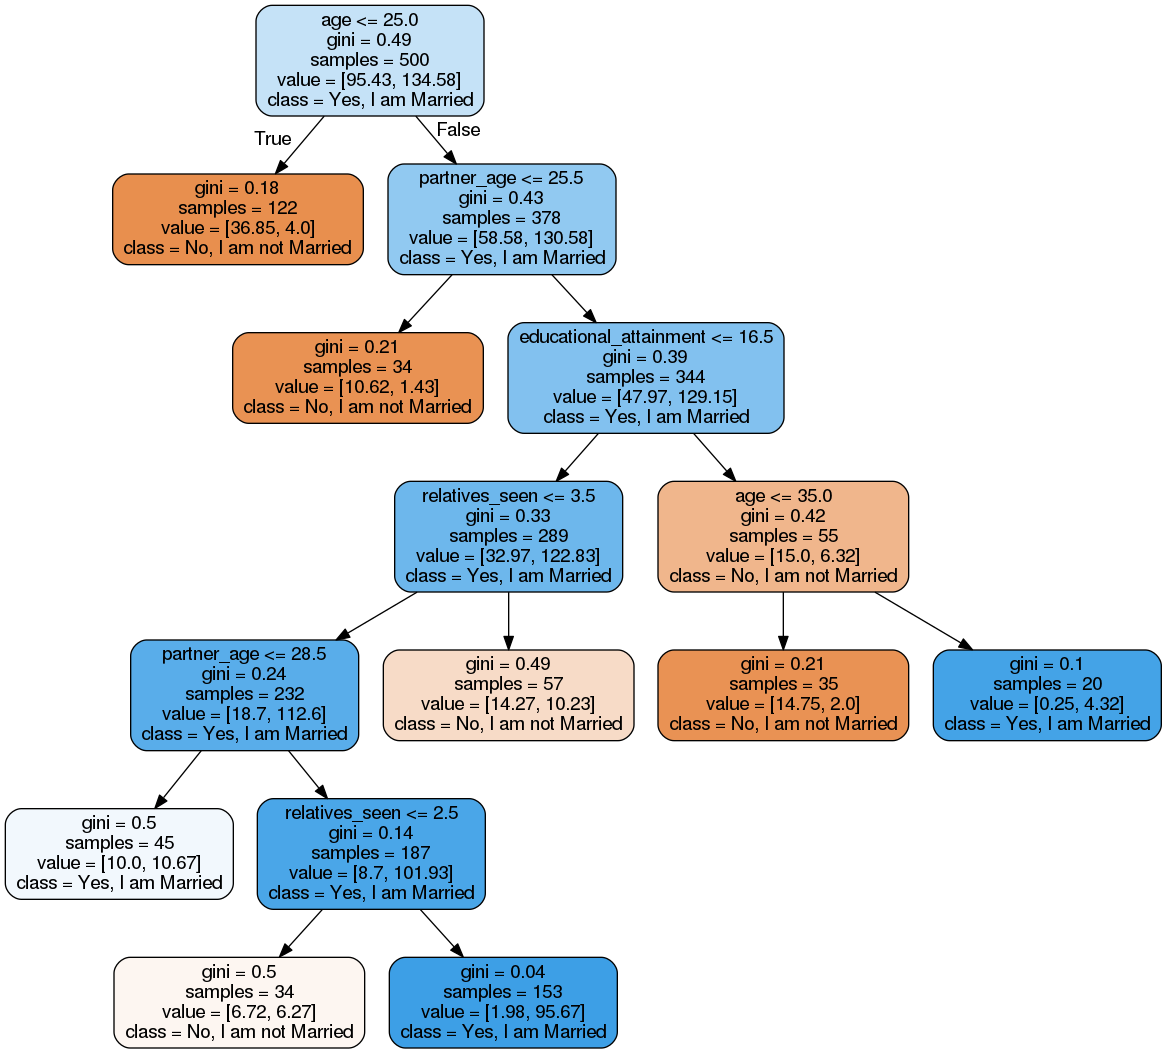

In [189]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(white_box, out_file=dot_data, feature_names = observation.columns,
                class_names = white_box.classes_,
                rounded = True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Nasze drzewo ma ograniczoną liczbę liści, więc jesteśmy w stanie narysować cały proces decyzyjny.
Widać np. że dla osób młodych algorytm łatwo (i poprawnie) podejmuje decyzje.